In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')

In [3]:

import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
#from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("liver_cirrhosis.csv")

In [5]:
# Column descriptions:
# N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
# Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
# Drug: type of drug D-penicillamine or placebo
# Age: age in days
# Sex: M (male) or F (female)
# Ascites: presence of ascites N (No) or Y (Yes)
# Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
# Spiders: presence of spiders N (No) or Y (Yes)
# Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# Bilirubin: serum bilirubin in [mg/dl]
# Cholesterol: serum cholesterol in [mg/dl]
# Albumin: albumin in [gm/dl]
# Copper: urine copper in [ug/day]
# Alk_Phos: alkaline phosphatase in [U/liter]
# SGOT: SGOT in [U/ml]
# Tryglicerides: triglicerides in [mg/dl]
# Platelets: platelets per cubic [ml/1000]
# Prothrombin: prothrombin time in seconds [s]
# Stage: histologic stage of disease ( 1, 2, or 3 )

In [6]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [7]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [8]:
df['Edema'].value_counts()

Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

In [9]:
# Missing Values
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [10]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [11]:
df.shape

(25000, 19)

In [12]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 15361


In [13]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
num_rows_after_removal = df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

Number of rows after removing duplicates: 9639


In [14]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000
mean,1910.982571,18429.717606,3.228571,371.706706,3.496118,97.027569,1973.572709,122.317487,123.587337,253.787605,10.713328,2.029152
std,1093.620373,3693.953156,4.512278,197.824339,0.382319,73.108854,1827.063380,47.653515,55.206301,95.740700,0.922026,0.809956
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1103.000000,15628.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,1.000000
50%,1690.000000,18628.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,2.000000
75%,2598.000000,20819.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,3.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


In [15]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [16]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})
df["Stage"] = df["Stage"].map({1:0, 2:1, 3:2})

In [17]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)




In [18]:
x_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
12977,673,2,0,12557,0,0,0,0,0,3.4,271.000000,3.63,464.000000,1376.000000,120.900000,55.000000,322.00000,11.6
884,2504,0,0,15730,0,0,1,1,0,0.5,120.000000,3.61,53.000000,804.000000,110.050000,52.000000,275.00000,10.6
2490,3492,0,1,18806,0,0,0,0,0,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,271.00000,10.6
1346,2255,0,1,22642,0,0,0,0,0,0.6,369.510563,4.07,161.000000,674.000000,26.350000,124.702128,240.00000,11.0
8852,186,2,0,16802,0,1,0,1,0,3.2,260.000000,3.19,91.000000,815.000000,127.100000,101.000000,219.00000,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,1427,2,1,19567,0,0,1,0,1,7.2,1015.000000,3.26,247.000000,3836.000000,198.400000,280.000000,216.00000,12.4
19856,2363,0,1,20834,0,0,1,1,0,1.4,226.000000,3.36,13.000000,810.000000,72.850000,62.000000,117.00000,11.6
8796,1030,0,0,20955,0,0,0,0,0,1.1,290.000000,3.99,38.000000,2120.000000,186.000000,146.000000,422.00000,9.6
5365,2812,2,0,20454,0,1,0,1,0,3.4,369.510563,3.92,97.648387,1982.655769,122.556346,124.702128,257.02457,10.6


In [19]:
y_train

12977    2
884      1
2490     0
1346     0
8852     2
        ..
16294    1
19856    2
8796     2
5365     2
4327     2
Name: Stage, Length: 7711, dtype: int64

In [20]:
categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly",
               "Spiders", "Edema"]

In [21]:
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


ML Models

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion,Pipeline,make_pipeline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

Without Standardizing

Multinomial Logistic

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the multiclass logistic regression model
logreg_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Only L2 regularization is supported for multinomial logistic regression
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_logreg_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.4627
Test Accuracy: 0.4663

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.46      0.52      0.48       599
           1       0.44      0.27      0.33       678
           2       0.49      0.63      0.55       651

    accuracy                           0.47      1928
   macro avg       0.46      0.47      0.46      1928
weighted avg       0.46      0.47      0.45      1928


Confusion Matrix (Train Set):
 [[1195  512  719]
 [ 939  719  972]
 [ 555  446 1654]]

Confusion Matrix (Test Set):
 [[309 125 165]
 [231 183 264]
 [137 107 407]]


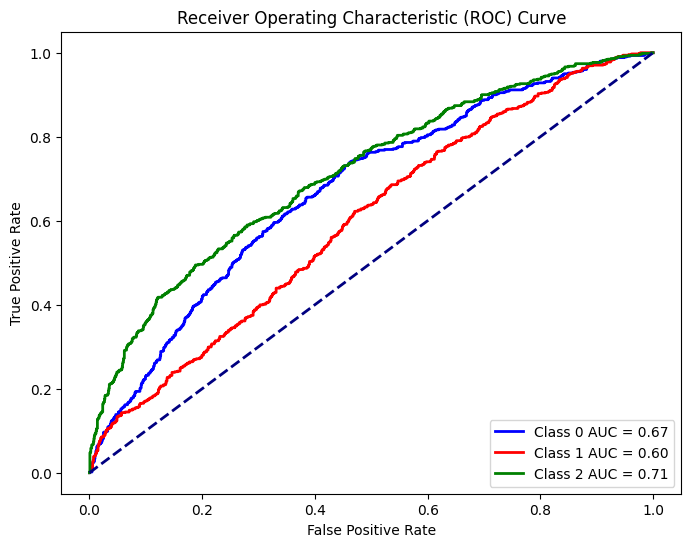

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes list according to your actual classes
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_logreg_model.predict_proba(x_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_rf_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.9916
Test Accuracy: 0.8760

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       599
           1       0.85      0.85      0.85       678
           2       0.92      0.92      0.92       651

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928


Confusion Matrix (Train Set):
 [[2393   30    3]
 [  17 2606    7]
 [   4    4 2647]]

Confusion Matrix (Test Set):
 [[513  72  14]
 [ 59 578  41]
 [ 19  34 598]]


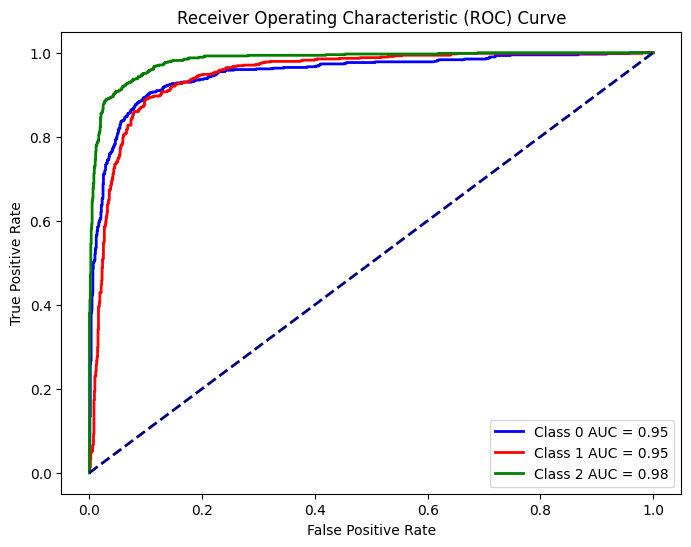

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes as per your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_rf_model.predict_proba(x_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


SVM Classifier

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier with probability estimates enabled
svm_classifier = SVC(probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_svm_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_svm_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_report_result)

print("\nConfusion Matrix (Train Set):\n", train_conf_matrix)
print("\nConfusion Matrix (Test Set):\n", test_conf_matrix)


Train Accuracy: 0.4744
Test Accuracy: 0.4943

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.48      0.43      0.45       599
           1       0.47      0.43      0.45       678
           2       0.52      0.62      0.57       651

    accuracy                           0.49      1928
   macro avg       0.49      0.49      0.49      1928
weighted avg       0.49      0.49      0.49      1928


Confusion Matrix (Train Set):
 [[1019  770  637]
 [ 723 1072  835]
 [ 453  635 1567]]

Confusion Matrix (Test Set):
 [[257 181 161]
 [176 294 208]
 [101 148 402]]


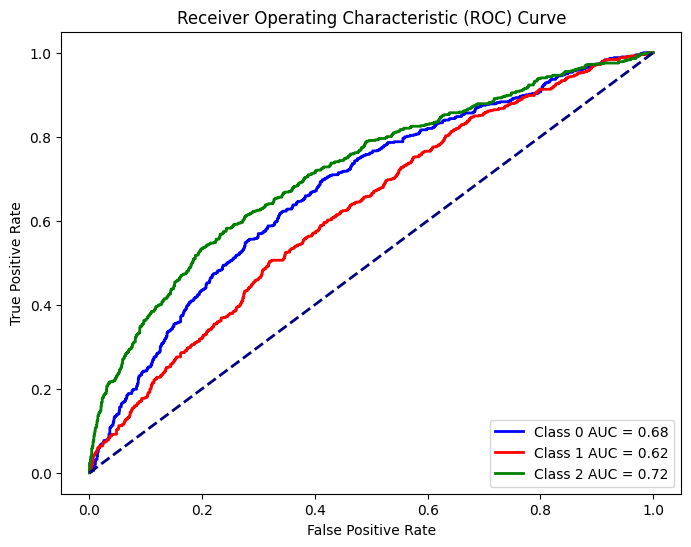

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_svm_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the train set
y_pred_train_knn = best_knn_model.predict(x_train)

# Make predictions on the test set
y_pred_test_knn = best_knn_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
train_conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)

# Evaluate the performance on the test set
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
test_conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
classification_report_result_knn = classification_report(y_test, y_pred_test_knn)

# Print the results
print(f'Train Accuracy (KNN): {train_accuracy_knn:.4f}')
print(f'Test Accuracy (KNN): {test_accuracy_knn:.4f}')
print('\nClassification Report (KNN - Test Set):\n', classification_report_result_knn)

print('\nConfusion Matrix (KNN - Train Set):\n', train_conf_matrix_knn)
print('\nConfusion Matrix (KNN - Test Set):\n', test_conf_matrix_knn)


Train Accuracy (KNN): 0.9917
Test Accuracy (KNN): 0.6592

Classification Report (KNN - Test Set):
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       599
           1       0.65      0.65      0.65       678
           2       0.70      0.69      0.69       651

    accuracy                           0.66      1928
   macro avg       0.66      0.66      0.66      1928
weighted avg       0.66      0.66      0.66      1928


Confusion Matrix (KNN - Train Set):
 [[2426    0    0]
 [  46 2584    0]
 [   7   11 2637]]

Confusion Matrix (KNN - Test Set):
 [[380 127  92]
 [130 444 104]
 [ 94 110 447]]


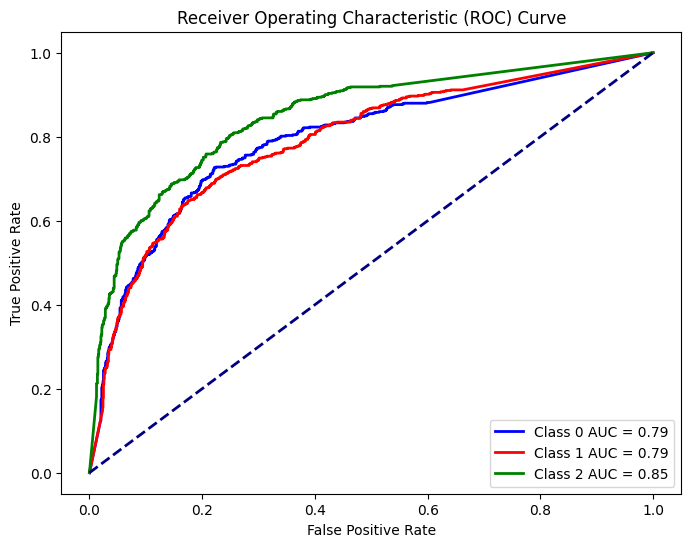

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_knn_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


DecisionTreeClassifier

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base classifier (DecisionTreeClassifier in this example)
base_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_bagging_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9851
Test Accuracy: 0.8828

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       599
           1       0.86      0.86      0.86       678
           2       0.92      0.92      0.92       651

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928


Confusion Matrix (Train Set):
[[2368   53    5]
 [  27 2589   14]
 [   5   11 2639]]

Confusion Matrix (Test Set):
[[519  63  17]
 [ 60 583  35]
 [ 18  33 600]]


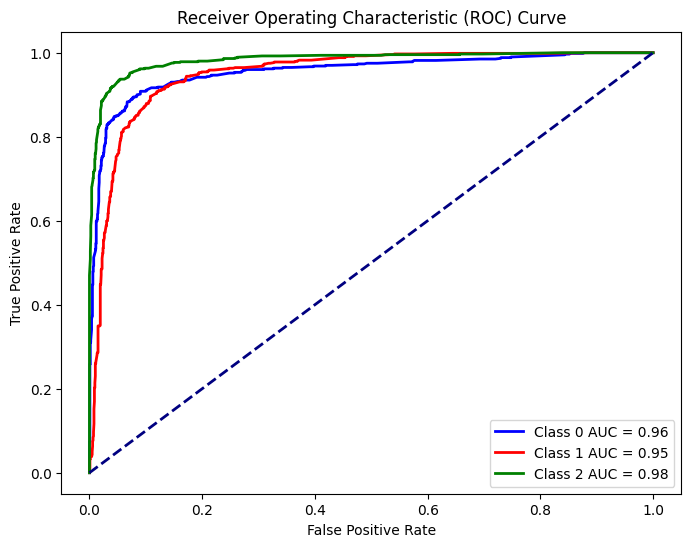

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_bagging_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the AdaBoost classifier with a DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [1, 2, 3],  # Parameters for the base estimator (DecisionTreeClassifier)
    'estimator__min_samples_split': [2, 5, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_adaboost_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_adaboost_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.8772
Test Accuracy: 0.8320

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       599
           1       0.78      0.82      0.80       678
           2       0.90      0.86      0.88       651

    accuracy                           0.83      1928
   macro avg       0.83      0.83      0.83      1928
weighted avg       0.83      0.83      0.83      1928


Confusion Matrix (Train Set):
[[2100  271   55]
 [ 230 2243  157]
 [  67  167 2421]]

Confusion Matrix (Test Set):
[[489  94  16]
 [ 73 558  47]
 [ 31  63 557]]


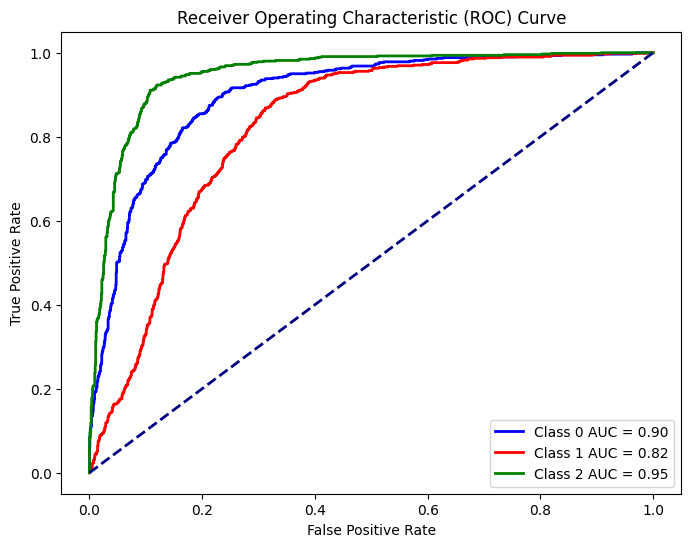

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_adaboost_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


CatBoost Classifier

In [35]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier(silent=True)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'colsample_bylevel': [0.8, 1.0],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_catboost_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_catboost_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_catboost_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9617
Test Accuracy: 0.8838

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       599
           1       0.85      0.87      0.86       678
           2       0.92      0.92      0.92       651

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928


Confusion Matrix (Train Set):
[[2296  101   29]
 [  61 2529   40]
 [  28   36 2591]]

Confusion Matrix (Test Set):
[[517  63  19]
 [ 53 591  34]
 [ 17  38 596]]


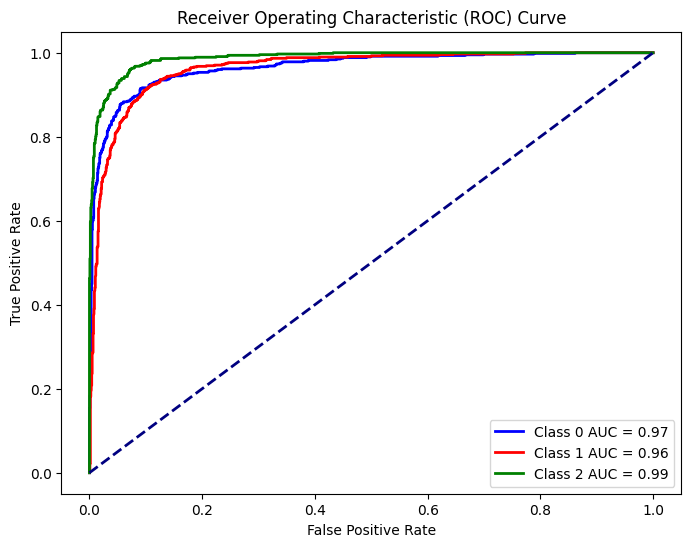

In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assume you have already trained the best CatBoost model (best_catboost_model)
# and have the test data (x_test, y_test)

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_catboost_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Bagging Classifier

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the Bagging classifier with the base estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'max_samples': [0.8, 1.0],       # Number of samples to draw from X to train each base estimator
    'max_features': [0.8, 1.0],      # Number of features to draw from X to train each base estimator
    'estimator__max_depth': [3, 5, 7]  # Depth of the base estimator trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_bagging_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.8278
Test Accuracy: 0.7899

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       599
           1       0.72      0.80      0.76       678
           2       0.84      0.81      0.82       651

    accuracy                           0.79      1928
   macro avg       0.80      0.79      0.79      1928
weighted avg       0.79      0.79      0.79      1928


Confusion Matrix (Train Set):
[[1945  391   90]
 [ 186 2223  221]
 [ 129  311 2215]]

Confusion Matrix (Test Set):
[[454 114  31]
 [ 67 543  68]
 [ 33  92 526]]


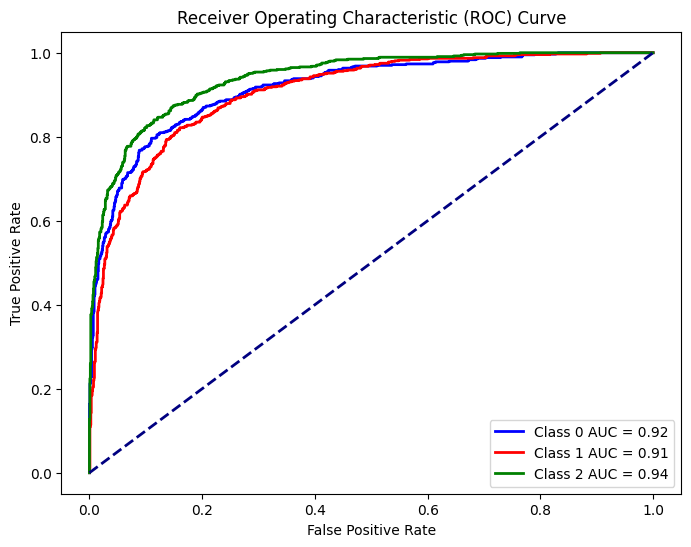

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_bagging_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Common parameter for GaussianNB
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_nb_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_nb_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_nb_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)



Train Accuracy: 0.4970
Test Accuracy: 0.4896

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.42      0.73      0.54       599
           1       0.45      0.23      0.30       678
           2       0.65      0.54      0.59       651

    accuracy                           0.49      1928
   macro avg       0.51      0.50      0.48      1928
weighted avg       0.51      0.49      0.47      1928


Confusion Matrix (Train Set):
[[1868  287  271]
 [1562  592  476]
 [ 878  405 1372]]

Confusion Matrix (Test Set):
[[438  85  76]
 [406 155 117]
 [194 106 351]]


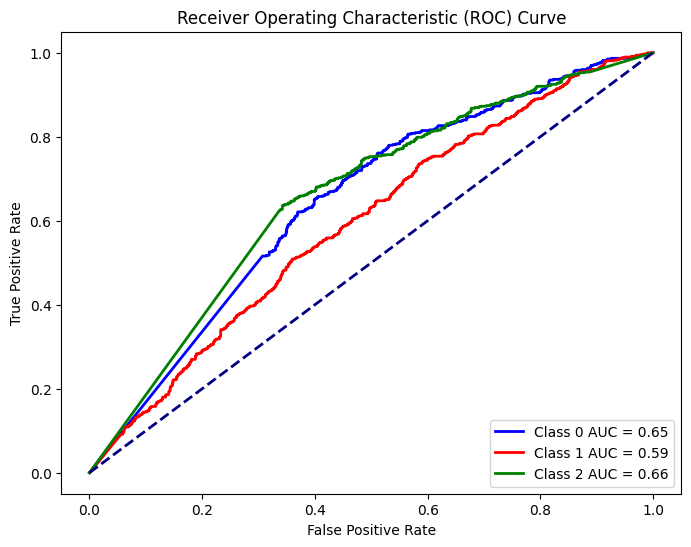

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Assuming you're using a Multinomial Naive Bayes model (adjust according to your needs)
nb_classifier = MultinomialNB()

# Define the parameter grid for GridSearchCV if you want to tune hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Example: smoothing parameter
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_naive_bayes_model = grid_search.best_estimator_

# Now you can use best_naive_bayes_model to make predictions
y_pred_proba = best_naive_bayes_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class as discussed earlier
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


XGBoost Classifier

In [23]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Adjust class labels to start from 0 (no adjustment needed here as per your latest code)
y_train_adjusted = np.array(y_train)
y_test_adjusted = np.array(y_test)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3)  # Specify number of classes

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_xgb_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
train_conf_matrix = confusion_matrix(y_train_adjusted, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)
test_conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
classification_report_result = classification_report(y_test_adjusted, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9907
Test Accuracy: 0.9108

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       599
           1       0.89      0.90      0.90       678
           2       0.94      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928


Confusion Matrix (Train Set):
[[2387   34    5]
 [  20 2604    6]
 [   2    5 2648]]

Confusion Matrix (Test Set):
[[533  52  14]
 [ 42 611  25]
 [ 19  20 612]]


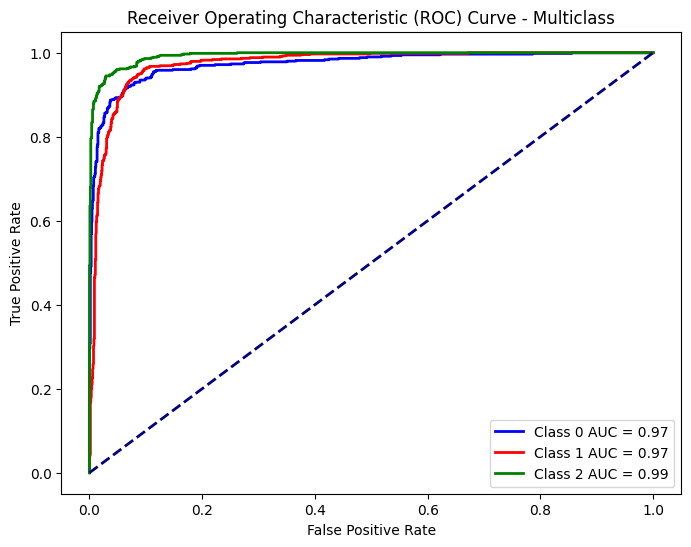

Macro-average AUC: 0.98
Micro-average AUC: 0.98


In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming `best_xgb_model` is your trained model, and `x_test`, `y_test_adjusted` are your test data

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test_adjusted, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_xgb_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

# Optionally, calculate the macro and micro average ROC AUC
# Macro-average ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Micro-average ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Macro-average AUC: {roc_auc['macro']:.2f}")
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


Applying RFE

In [25]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 19 features
rfe = RFE(estimator=best_xgb_model, n_features_to_select=18)

# Fit RFE to the training data
rfe.fit(x_train, y_train_adjusted)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train XGBoost model with selected features
best_xgb_model_rfe = best_xgb_model.fit(x_train[selected_features], y_train_adjusted)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_xgb_model_rfe.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test_adjusted, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of XGBoost model with RFE (18 features):", accuracy_rfe)

Accuracy of XGBoost model with RFE (18 features): 0.9107883817427386


Applying Feature Importance

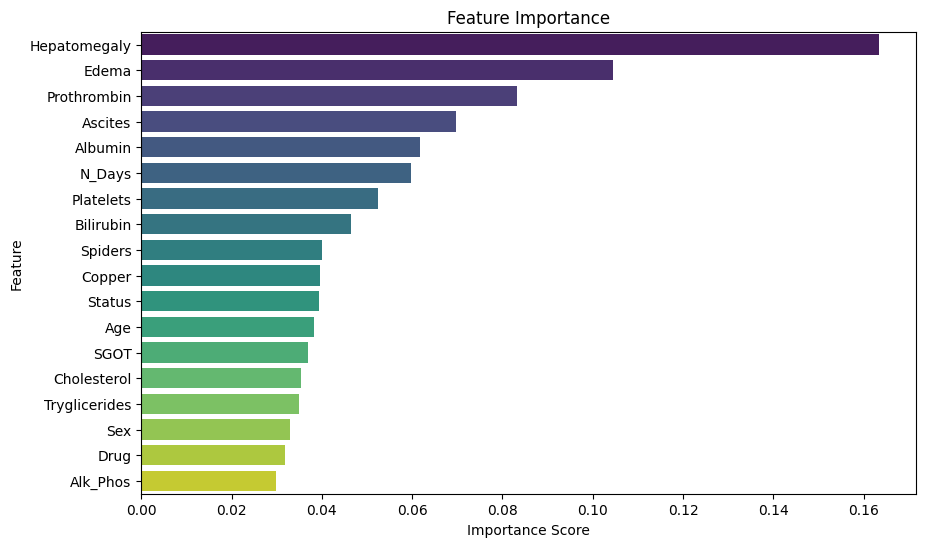

In [26]:
# Get feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Removing least important variables and Fitting XGB

Alk_Phos

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation, excluding the 'Alk_Phos' column
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['Alk_Phos']), y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set, excluding the 'Alk_Phos' column
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['Alk_Phos']))

# Make predictions on the training set, excluding the 'Alk_Phos' column
y_pred_train = best_xgb_model.predict(x_train.drop(columns=['Alk_Phos']))

# Calculate accuracies
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)

# Generate the classification report and confusion matrix for the test set
classification_report_result = classification_report(y_test_adjusted, y_pred_test)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
conf_matrix_train = confusion_matrix(y_train_adjusted, y_pred_train)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test Set):")
print(classification_report_result)

# Optionally, print the confusion matrices
print("Confusion Matrix (Test Set):")
print(conf_matrix)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)


Train Accuracy: 0.9908
Test Accuracy: 0.9129
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       599
           1       0.90      0.90      0.90       678
           2       0.93      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928

Confusion Matrix (Test Set):
[[536  48  15]
 [ 39 610  29]
 [ 16  21 614]]
Confusion Matrix (Training Set):
[[2385   36    5]
 [  17 2608    5]
 [   2    6 2647]]


Alk_Phos AND Drug


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation, excluding the 'Alk_Phos' column
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['Alk_Phos',"Drug"]), y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set, excluding the 'Alk_Phos' column
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['Alk_Phos',"Drug"]))

# Make predictions on the training set, excluding the 'Alk_Phos' column
y_pred_train = best_xgb_model.predict(x_train.drop(columns=['Alk_Phos',"Drug"]))

# Calculate accuracies
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)

# Generate the classification report and confusion matrix for the test set
classification_report_result = classification_report(y_test_adjusted, y_pred_test)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
conf_matrix_train = confusion_matrix(y_train_adjusted, y_pred_train)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test Set):")
print(classification_report_result)

# Optionally, print the confusion matrices
print("Confusion Matrix (Test Set):")
print(conf_matrix)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)


Train Accuracy: 0.9828
Test Accuracy: 0.9098
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       599
           1       0.90      0.90      0.90       678
           2       0.93      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928

Confusion Matrix (Test Set):
[[535  49  15]
 [ 41 608  29]
 [ 18  22 611]]
Confusion Matrix (Training Set):
[[2353   64    9]
 [  33 2589    8]
 [   4   15 2636]]


MLP

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("liver_cirrhosis.csv")

In [ ]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 15361


In [ ]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
num_rows_after_removal = df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

Number of rows after removing duplicates: 9639


In [ ]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})
df["Stage"] = df["Stage"].map({1:0, 2:1, 3:2})

In [ ]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

# Assuming you have 3 classes in your target variable
num_classes = 3

# One-hot encode the labels if they are not already
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# validation Set
x_train , x_val, y_train_encoded , y_val = train_test_split(x_train,y_train_encoded,test_size=0.2,random_state=0)

# Build the model
model = Sequential()
model.add(InputLayer(shape=(18,)))
model.add(Dense(units=5, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=3, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=num_classes, activation="softmax"))  # Use softmax activation for multiclass

# Summary of the model
model.summary()

# Compile the model
optim = Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"])  # Use categorical_crossentropy

earlystopping = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = True

)

# Train the model
model.fit(x_train, y_train_encoded, validation_data=(x_val,y_val), epochs=100,callbacks=earlystopping)

# Predict probabilities on the test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = y_pred_probs.argmax(axis=-1)

# If y_test is one-hot encoded, convert it back to class labels
y_test_labels = y_test_encoded.argmax(axis=-1)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 5)              │            95 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 16 (64.00 B)

Epoch 1/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3349 - loss: 1.1576 - val_accuracy: 0.3545 - val_loss: 1.0965
Epoch 2/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3300 - loss: 1.0994 - val_accuracy: 0.3545 - val_loss: 1.0960
Epoch 3/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3229 - loss: 1.0987 - val_accuracy: 0.3545 - val_loss: 1.0973
Epoch 4/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3389 - loss: 1.0990 - val_accuracy: 0.3545 - val_loss: 1.0970
Epoch 5/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3391 - loss: 1.0991 - val_accuracy: 0.3467 - val_loss: 1.0973
Epoch 6/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3455 - loss: 1.0985 - val_accuracy: 0.3467 - val_loss: 1.0964
Epoch 7/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3484 - loss: 1.0987 - val_accuracy: 0.3545 - val_loss: 1.0963
Epoch 8/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3381 - loss: 1.0986 - val_accu